# Pump it Up Well Predictor Initial EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
X = pd.read_csv('Data/training_Set_values.csv')
y = pd.read_csv('Data/training_Set_labels.csv')

df = X.merge(y, how='inner', on='id')

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [3]:
y.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
y = y.drop(columns='id')
y.head()

,status_group
0,functional
1,functional
2,functional
3,non functional
4,functional


In [5]:
X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [8]:
len(df.dropna()) / len(df)

0.4682323232323232

## Missing Values:
Dropping all missing values would drop almost half of the data.  However we see that 'scheme_name' accounts for most of our missing values.  We can consider dropping that column.  Let's check the cardinality of the categorical columns.

In [9]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].nunique())

date_recorded
356
funder
1897
installer
2145
wpt_name
37400
basin
9
subvillage
19287
region
21
lga
125
ward
2092
public_meeting
2
recorded_by
1
scheme_management
12
scheme_name
2696
permit
2
extraction_type
18
extraction_type_group
13
extraction_type_class
7
management
12
management_group
5
payment
7
payment_type
7
water_quality
8
quality_group
6
quantity
5
quantity_group
5
source
10
source_type
7
source_class
3
waterpoint_type
7
waterpoint_type_group
6
status_group
3


We have 60,000 samples and we would want at least 100 examples of any category for our models to learn the relationship between the feature and the target.  Instead of dropping a lot of rows to make this happen, we will drop any columns with a cardinality above 600.

In [10]:
drop_list = []

for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() > 600:
        drop_list.append(col)
drop_list

['funder', 'installer', 'wpt_name', 'subvillage', 'ward', 'scheme_name']

In [11]:
df_low_card = df.drop(columns=drop_list)

In [12]:
df_low_card.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
gps_height                  0
longitude                   0
latitude                    0
num_private                 0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint

In [13]:
len(df_low_card.dropna()) / len(df)

0.8390740740740741

This has drastically reduced our missing values problem.  Let's see if we can devise a strategy for the rest.

In [14]:
missing_cols = [col for col in df_low_card.columns if df[col].isna().sum() > 0]
missing_cols

['public_meeting', 'scheme_management', 'permit']

In [15]:
for col in missing_cols:
    print()
    print(col)
    display(df_low_card[col].value_counts())


public_meeting


True     51011
False     5055
Name: public_meeting, dtype: int64


scheme_management


VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64


permit


True     38852
False    17492
Name: permit, dtype: int64

# Missing Values Stratigizing

`public_meeting`
There are 10x more Trues than falses here, so we will fill this column with the most frequent value.  We hope to be 90% correct in this imputation.

Also, `public_meeting` looks like a object, but it's a boolean.  We can convert it to a str.

`scheme_management`
There are a lot of categories here and not one that is overwhelmingly larger than the rest combined.  "VWC" makes up 2/3 of the samples, so if we impute with that we will only be about 70% correct.  For this column we will create a new category, 'unknown'.

We also see some problems here that we have 3 categories with fewer than 100 samples.  We said before we want at least 100 samples per category so we will combine those with 'Other'

`permit`
"True" appears to make up 2/3 of the categories here.  Like `scheme_management`, we will create a new 'unknown' category for this.  This is also a boolean column.

In [16]:
type(df_low_card.loc[0,'public_meeting'])

bool

In [17]:
df_low_card[['public_meeting','permit']] = df_low_card[['public_meeting','permit']].astype('str')
df_low_card[['public_meeting','permit']].value_counts()

public_meeting  permit
True            True      34746
                False     13847
                nan        2418
False           False      2380
                True       2308
nan             True       1798
                False      1265
False           nan         367
nan             nan         271
dtype: int64

In [18]:
type(df_low_card.loc[0,'public_meeting'])

str

In [19]:
df_low_card[['public_meeting','scheme_management', 'permit']] = df_low_card[['public_meeting','scheme_management', 'permit']].replace('nan', np.nan)

In [20]:
df_low_card[['scheme_management', 'permit']] = df_low_card[['scheme_management', 'permit']].fillna('Unknown')
df_low_card.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
gps_height                  0
longitude                   0
latitude                    0
num_private                 0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management           0
permit                      0
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint

# Rare Categories

In [21]:
for col in df_low_card.select_dtypes(include="object").columns:
    print()
    print(col)
    display(df_low_card[col].value_counts())


date_recorded


2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
2013-02-14    444
2013-01-24    435
2011-03-05    434
2013-02-15    429
2013-03-15    428
2011-03-11    426
2013-01-30    421
2013-02-16    418
2011-03-23    417
2011-03-09    416
2013-01-18    409
2013-02-26    391
2011-03-30    391
2011-03-24    381
2013-03-19    381
2013-02-13    380
2013-01-23    379
2011-03-12    379
2011-03-03    378
2013-01-28    376
2011-03-13    373
2011-07-27    373
2013-02-19    371
2013-02-02    370
2013-02-18    369
2013-01-19    368
2011-03-22    364
2013-01-22    364
2011-03-10    364
2013-02-08    363
2013-03-18    360
2012-10-22    353
2011-03-21    351
2011-02-26    351
2013-03-04    347
2013-03-13    346
2011-07-30    345
2013-01-16    342
2011-03-26    342
2011-02-28    341
2013-02-27    340
2011-07-19    338
2013-01-25    338
2013-02-01    338
2011-04-17    337
2013-02-12


basin


Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64


region


Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64


lga


Njombe              2503
Arusha Rural        1252
Moshi Rural         1251
Bariadi             1177
Rungwe              1106
Kilosa              1094
Kasulu              1047
Mbozi               1034
Meru                1009
Bagamoyo             997
Singida Rural        995
Kilombero            959
Same                 877
Kibondo              874
Kyela                859
Kahama               836
Magu                 824
Kigoma Rural         824
Maswa                809
Karagwe              771
Mbinga               750
Iringa Rural         728
Serengeti            716
Namtumbo             694
Lushoto              694
Songea Rural         693
Mpanda               679
Mvomero              671
Ngara                669
Ulanga               665
Makete               630
Kwimba               627
Mbarali              626
Hai                  625
Rombo                594
Shinyanga Rural      588
Nzega                575
Ludewa               564
Mkuranga             560
Iramba               544



public_meeting


True     51011
False     5055
Name: public_meeting, dtype: int64


recorded_by


GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64


scheme_management


VWC                 36793
WUG                  5206
Unknown              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64


permit


True       38852
False      17492
Unknown     3056
Name: permit, dtype: int64


extraction_type


gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64


extraction_type_group


gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64


extraction_type_class


gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64


management


vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64


management_group


user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64


payment


never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64


payment_type


never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64


water_quality


soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64


quality_group


good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


quantity


enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64


quantity_group


enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


source


spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64


source_type


spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64


source_class


groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64


waterpoint_type


communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64


waterpoint_type_group


communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


status_group


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Dealing with Rare Categories:

`date_recorded`
This feature is actually probably not useful.  We will drop it entirely.

`lga` This is the most specific location of the well.  We will combine the rare categories into 'other'
`basin` and `region` will then be redundance.  We will drop those

`recorded_by` has a cardinality of 1, we will drop it.

`scheme_management` we will combine the rare categories into 'Other'

`extraction_type`, `extraction_type_group` and `extraction_type_class`
These are somewhat redundant, so we only need one of them.  `extraction_type_group`, after some study, seems to have combined the rarer categories into the 'submersible' category.  Keeping that column gives us the best balance of specificity while reducing rare categories.  We will drop `extration_type` and `extraction_type_class`

`water_quality` we will combine 'fluoride abandoned' and 'fluoride'

`waterpoint_type` and `waterpoint_type_group` are redundant.  We will keep drop `waterpoint_type_group` and combine 'dam' and 'other' categories.

similarly `source_type` and `source_class` are redundant to `source`.  `quantity_group` is redundant to `quantity`, 

In [22]:
drop_cols = ['date_recorded', 'recorded_by', 'extraction_type','extraction_type_class', 'waterpoint_type_group', 'source_type', 
             'source_class', 'quantity_group', 'basin', 'region', 'id', 'payment_type']
df_rare_cat_dropped = df_low_card.drop(columns=drop_cols)

In [23]:
def combine_rare_cats(series, new_category='Other'):
    new_series = series.copy()
    vals = new_series.value_counts()
    rare = vals < 100
    cats_to_replace = vals[rare].index
    new_series = new_series.replace(cats_to_replace, new_category)
    return new_series

In [24]:
## Combine rare values in 'lga' into an 'Other' category
df_rare_cat_dropped['lga'] = combine_rare_cats(df_rare_cat_dropped['lga'])
df_rare_cat_dropped['lga'].value_counts()

Njombe              2503
Arusha Rural        1252
Moshi Rural         1251
Bariadi             1177
Rungwe              1106
Kilosa              1094
Kasulu              1047
Mbozi               1034
Meru                1009
Bagamoyo             997
Singida Rural        995
Kilombero            959
Same                 877
Kibondo              874
Kyela                859
Kahama               836
Kigoma Rural         824
Magu                 824
Maswa                809
Karagwe              771
Mbinga               750
Iringa Rural         728
Serengeti            716
Lushoto              694
Namtumbo             694
Songea Rural         693
Other                691
Mpanda               679
Mvomero              671
Ngara                669
Ulanga               665
Makete               630
Kwimba               627
Mbarali              626
Hai                  625
Rombo                594
Shinyanga Rural      588
Nzega                575
Ludewa               564
Mkuranga             560


In [25]:
## Combine rare categories in 'scheme_management' into existing 'Other' category
df_rare_cat_dropped['scheme_management'] = combine_rare_cats(df_rare_cat_dropped['scheme_management'])
df_rare_cat_dropped['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Unknown              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 936
Name: scheme_management, dtype: int64

In [26]:
## Combine 'fluoride abandoned' and 'fluoride' in `water_quality`
df_rare_cat_dropped['water_quality'] = df_rare_cat_dropped['water_quality'].replace('fluoride abandoned', 'fluoride')
df_rare_cat_dropped['water_quality'].value_counts()

soft               50818
salty               4856
unknown             1876
milky                804
coloured             490
salty abandoned      339
fluoride             217
Name: water_quality, dtype: int64

In [27]:
## Combine 'dam' and 'Other' in 'waterpoint_type'
df_rare_cat_dropped['waterpoint_type'] = df_rare_cat_dropped['waterpoint_type'].replace('other', 'Other')
df_rare_cat_dropped['waterpoint_type'] = combine_rare_cats(df_rare_cat_dropped['waterpoint_type'])
df_rare_cat_dropped['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
Other                           6387
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
Name: waterpoint_type, dtype: int64

In [28]:
df_rare_cat_dropped.describe(include='object')

,lga,public_meeting,scheme_management,permit,extraction_type_group,management,management_group,payment,water_quality,quality_group,quantity,source,waterpoint_type,status_group
count,59400,56066,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,116,2,10,3,13,12,5,7,7,6,5,10,6,3
top,Njombe,True,VWC,True,gravity,vwc,user-group,never pay,soft,good,enough,spring,communal standpipe,functional
freq,2503,51011,36793,38852,26780,40507,52490,25348,50818,50818,33186,17021,28522,32259


# Numeric Column Exploration 

In [29]:
df_rare_cat_dropped.describe(include='number')

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


We have some suspicious distributions here, namely `longitude`, `amount_tsh` and `num_private`.  

`amount_tsh` is the amount of water in a well.  This seems significant, but most of the values are 0 and one is 350,000.  This is a challenge to deal with.  We will try just dropping the biggest outliers, those about 10,000 and leave the rest.  We could also engineer a feature to tag if a well is dry or not.

`population` is probably fine, since we'd expect there to be some bigger cities.  I'm actually surprised that the largest city in the dataset has only 30,500 people!  That's pretty small.

`region_code` and `district_code` are also probably redundant with `region` and `lga`  We will drop those codes and check out the distributions of the rest.

`construction_year` the 0s in this column are probably missing values.  I think the best way to deal with this is to one-hot encode the year anyway.  Does an older well always mean most likely to break?

`num_private` is almost entire 0s.  We will drop it.

In [30]:
df_cleaned_cats = df_rare_cat_dropped.drop(columns=['region_code','district_code', 'num_private'])


amount_tsh


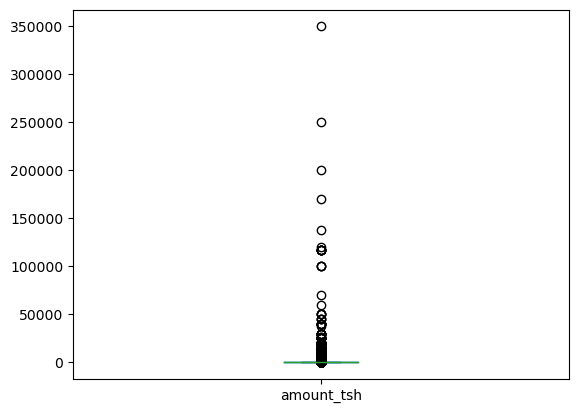


gps_height


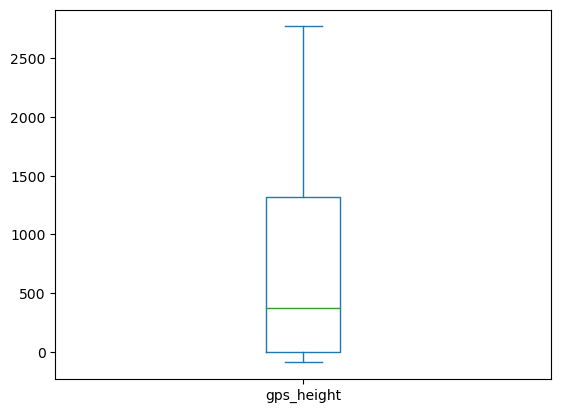


longitude


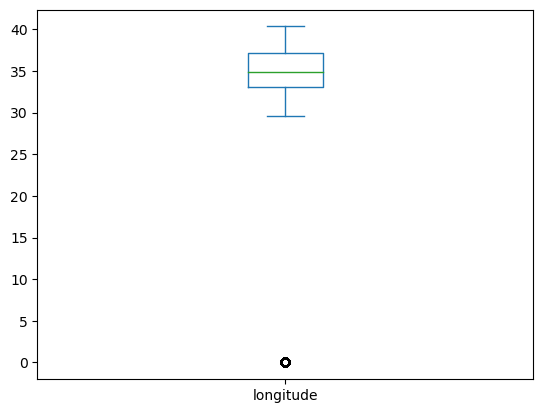


latitude


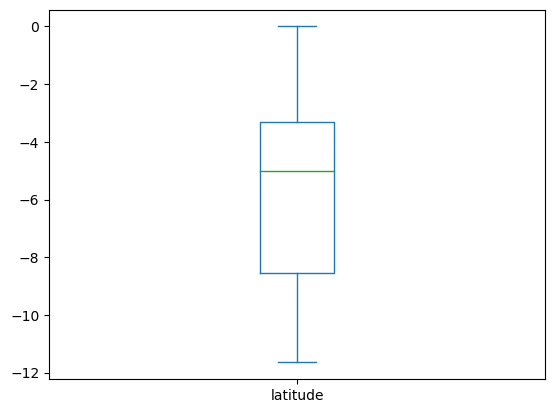


population


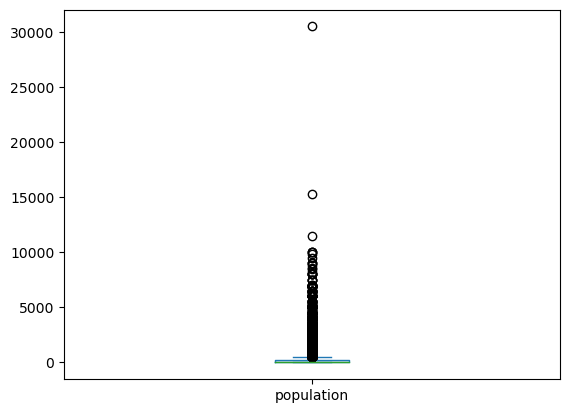


construction_year


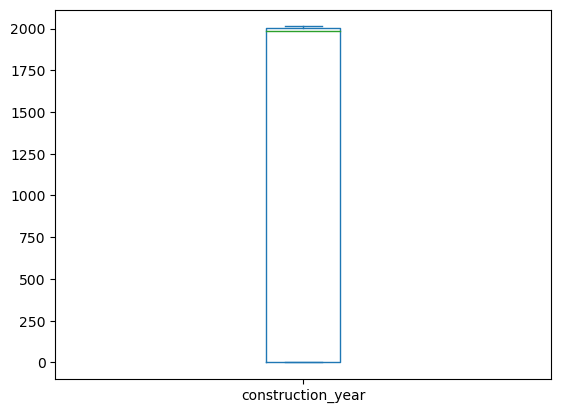

In [31]:
for col in df_cleaned_cats.select_dtypes(include='number').columns:
    print()
    print(col)
    df_cleaned_cats[col].plot(kind='box')
    plt.show()

In [32]:
# drop amount_tsh outliers
df_cleaned_cats = df_cleaned_cats[df_cleaned_cats['amount_tsh'] < 10000]

# create new 'has_water' flag
df_cleaned_cats['has_water'] = 1
df_cleaned_cats.loc[df_cleaned_cats['amount_tsh']==0, 'has_water'] = 0
df_cleaned_cats.head()

,amount_tsh,gps_height,longitude,latitude,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_group,management,management_group,payment,water_quality,quality_group,quantity,source,waterpoint_type,status_group,has_water
0,6000.0,1390,34.938093,-9.856322,Ludewa,109,True,VWC,False,1999,gravity,vwc,user-group,pay annually,soft,good,enough,spring,communal standpipe,functional,1
1,0.0,1399,34.698766,-2.147466,Serengeti,280,NaN,Other,True,2010,gravity,wug,user-group,never pay,soft,good,insufficient,rainwater harvesting,communal standpipe,functional,0
2,25.0,686,37.460664,-3.821329,Simanjiro,250,True,VWC,True,2009,gravity,vwc,user-group,pay per bucket,soft,good,enough,dam,communal standpipe multiple,functional,1
3,0.0,263,38.486161,-11.155298,Nanyumbu,58,True,VWC,True,1986,submersible,vwc,user-group,never pay,soft,good,dry,machine dbh,communal standpipe multiple,non functional,0
4,0.0,0,31.130847,-1.825359,Karagwe,0,True,Unknown,True,0,gravity,other,other,never pay,soft,good,seasonal,rainwater harvesting,communal standpipe,functional,0


In [33]:
# convert 'construction_year' to categorical
df_cleaned_cats['construction_year'] = df_cleaned_cats['construction_year'].astype('object')

In [34]:
# Filter Longitude bad values
df_cleaned = df_cleaned_cats[df_cleaned_cats['longitude'] > 0]

In [35]:
df_cleaned.shape[0] / df.shape[0]

0.9655050505050505

We did a lot of cleaning and filtering and lost less than 5% of our data.

# EDA

In [36]:
df_cleaned.head()

,amount_tsh,gps_height,longitude,latitude,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_group,management,management_group,payment,water_quality,quality_group,quantity,source,waterpoint_type,status_group,has_water
0,6000.0,1390,34.938093,-9.856322,Ludewa,109,True,VWC,False,1999,gravity,vwc,user-group,pay annually,soft,good,enough,spring,communal standpipe,functional,1
1,0.0,1399,34.698766,-2.147466,Serengeti,280,NaN,Other,True,2010,gravity,wug,user-group,never pay,soft,good,insufficient,rainwater harvesting,communal standpipe,functional,0
2,25.0,686,37.460664,-3.821329,Simanjiro,250,True,VWC,True,2009,gravity,vwc,user-group,pay per bucket,soft,good,enough,dam,communal standpipe multiple,functional,1
3,0.0,263,38.486161,-11.155298,Nanyumbu,58,True,VWC,True,1986,submersible,vwc,user-group,never pay,soft,good,dry,machine dbh,communal standpipe multiple,non functional,0
4,0.0,0,31.130847,-1.825359,Karagwe,0,True,Unknown,True,0,gravity,other,other,never pay,soft,good,seasonal,rainwater harvesting,communal standpipe,functional,0


In [37]:
df_cleaned['status_group'].value_counts()

functional                 31183
non functional             22245
functional needs repair     3923
Name: status_group, dtype: int64

In [38]:
df_cleaned['quality_group'].value_counts()

good        49201
salty        4999
unknown      1661
milky         803
colored       479
fluoride      208
Name: quality_group, dtype: int64

In [39]:
df_cleaned['quantity'].value_counts()

enough          32089
insufficient    14505
dry              5985
seasonal         3999
unknown           773
Name: quantity, dtype: int64

C:\Users\caell\AppData\Local\Temp\ipykernel_8544\2098305040.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cleaned.corr()


<Axes: >

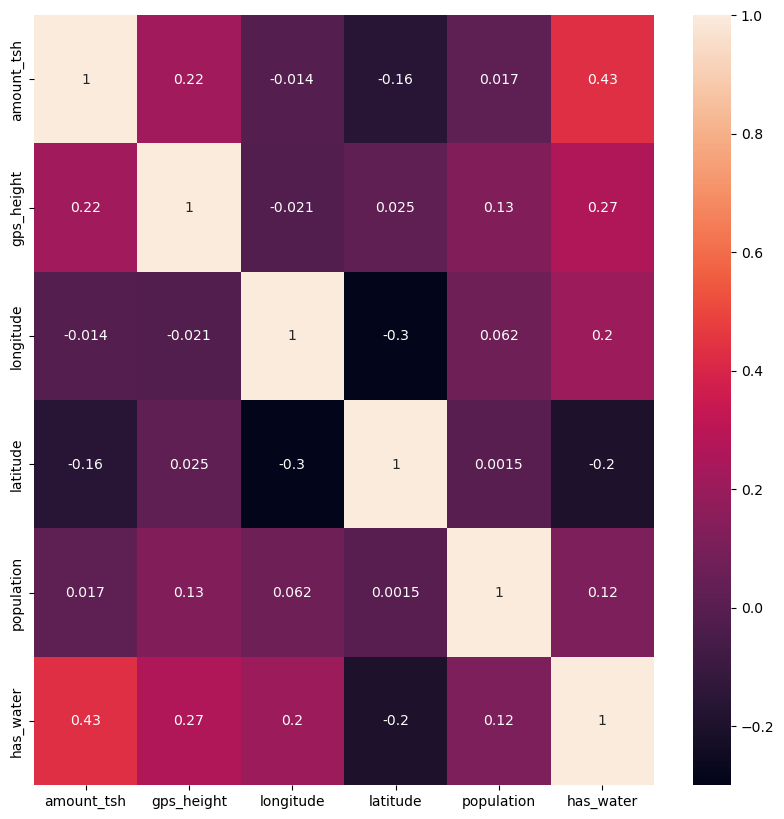

In [41]:
corr = df_cleaned.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax)

No really strong correlations between features here, except our has_water and amount_tsh, which is to be expected.  Interesting weak correlation between longitude, latitude, gps_height and has_water.  Location seems to matter a little.

## Is there a connection between water levels and functional wells?

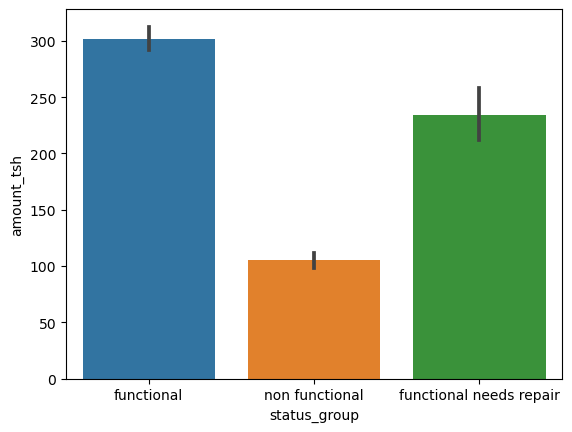

In [46]:
sns.barplot(data=df_cleaned, x='status_group', y='amount_tsh')

import os
os.makedirs('Images', exist_ok=True)
plt.savefig('Images/well_depth_by_class.png')

We can see a big connection here between the amount of water in a well and whether a well is functioning.  Functioning wells have 3x as much water (on average) as non-functioning wells.  The confidence interval is small, too.

## Is there a connection between population and functional wells?

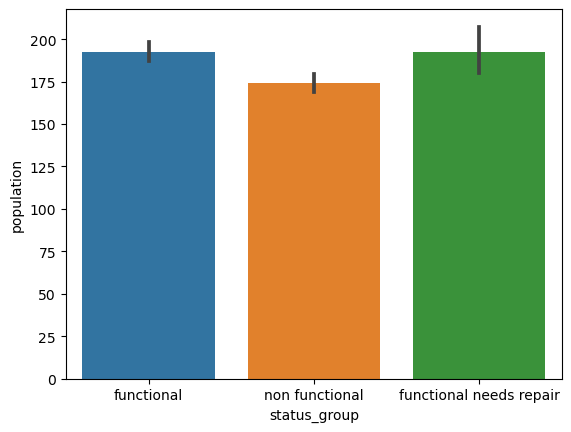

In [47]:
sns.barplot(data=df_cleaned, x='status_group', y='population')
plt.savefig('Images/population_by_class.png')

# Data Preparation

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(transform_output='pandas')

In [44]:
y = df_cleaned['status_group']
X = df_cleaned.drop(columns='status_group')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(43013, 20)

## Numeric Preparation
None of the numeric columns are missing values and we aren't going to scale at this point.  We don't need to do anything with the numeric data.


## Categorical

While it's tempting to ordinal encode 'Quantity', it's not clear what the ordering would be for 'unknown' and 'seasonal'. We will just one-hot encode it instead.  The rest seem to be nominal.

We took care of 2 of the 3 column missing values previously.  The only one left is `public_meeting` that we want to use the most frequent value for.

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43013 entries, 19545 to 58440
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             43013 non-null  float64
 1   gps_height             43013 non-null  int64  
 2   longitude              43013 non-null  float64
 3   latitude               43013 non-null  float64
 4   lga                    43013 non-null  object 
 5   population             43013 non-null  int64  
 6   public_meeting         40788 non-null  object 
 7   scheme_management      43013 non-null  object 
 8   permit                 43013 non-null  object 
 9   construction_year      43013 non-null  object 
 10  extraction_type_group  43013 non-null  object 
 11  management             43013 non-null  object 
 12  management_group       43013 non-null  object 
 13  payment                43013 non-null  object 
 14  water_quality          43013 non-null  object 
 15

In [46]:
# Selection categorical columns
cat_cols = make_column_selector(dtype_include=['object','bool'])

# crete and imputer
freq_imputer = SimpleImputer(strategy='most_frequent')

# Create a one-hot encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Put them in a pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)

# create our tuple
cat_tuple = ('Categorical', cat_pipe, cat_cols)

## ColumnTransformer

In [47]:
X_train['permit'].unique()

array(['Unknown', 'True', 'False'], dtype=object)

In [48]:
# Create the column transformer

preprocessor = ColumnTransformer([cat_tuple], remainder='passthrough',
                                verbose_feature_names_out=False)

preprocessor.fit_transform(X_train).head()

,lga_Arusha Rural,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro Rural,lga_Moshi Rural,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nzega,lga_Other,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,public_meeting_False,public_meeting_True,scheme_management_Company,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_Unknown,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_False,permit_True,permit_Unknown,construction_year_0,construction_year_1960,construction_year_1961,construction_year_1962,construction_year_1963,construction_year_1964,construction_year_1965,construction_year_1966,construction_year_1967,construction_year_1968,construction_year_1969,construction_year_1970,construction_year_1971,construction_year_1972,construction_year_1973,construction_year_1974,construction_year_1975,construction_year_1976,construction_year_1977,construction_year_1978,construction_year_1979,construction_year_1980,construction_year_1981,construction_year_1982,construction_year_1983,construction_year_1984,construction_year_1985,construction_year_1986,construction_year_1987,construction_year_1988,construction_year_1989,construction_year_1990,construction_year_1991,construction_year_1992,construction_year_1993,construction_year_1994,construction_year_1995,construction_year_1996,construction_year_1997,construction_year_1998,construction_year_1999,construction_year_2000,construction_year_2001,construction_year_2002,construction_year_2003,construction_year_2004,construction_year_2005,construction_year_2006,construction_year_2007,construction_year_2008,construction_year_2009,construction_year_2010,construction_year_2011,construction_year_2012,construction_year_2013,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_never pay,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,water_qu

In [49]:
import joblib

to_save = {'preprocessor':preprocessor,
           'df_cleaned':df_cleaned,
           'X_train':X_train,
           'X_test':X_test,
           'y_train':y_train,
           'y_test':y_test}

joblib.dump(to_save, 'processor_and_clean_data.joblib')

['processor_and_clean_data.joblib']